In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [22]:
# Generate universe functions
RBC = np.arange(30, 70, 1)
HB = np.arange(110, 190, 1)

# Membership functions for RBC
RBC_High = fuzz.trimf(RBC, [62, 71, 71])
RBC_Normal = fuzz.trimf(RBC, [44, 62, 71])
RBC_Low = fuzz.trapmf(RBC, [20, 20, 30, 62])

# Membership functions for HB
HB_High = fuzz.trimf(HB, [172, 190, 191])
HB_Normal = fuzz.trimf(HB, [131, 173, 189])
HB_Low = fuzz.trimf(HB, [131, 131, 173])

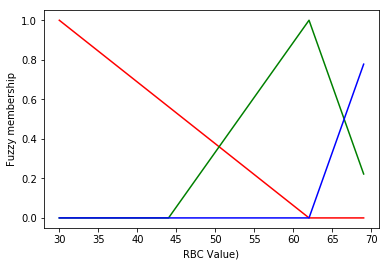

In [23]:
# Visualize membership functions for temperature
fig, ax = plt.subplots()

ax.plot(RBC, RBC_Low, 'r', RBC, RBC_Normal, 'g', RBC, RBC_High, 'b')
ax.set_ylabel('Fuzzy membership')
ax.set_xlabel('RBC Value)')
ax.set_ylim(-0.05, 1.05);

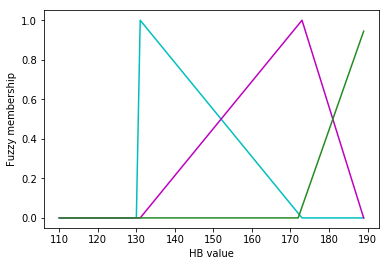

In [24]:
# Visualize membership functions for customers
fig, ax = plt.subplots()

ax.plot(HB, HB_Low, 'c', HB, HB_Normal, 'm', HB, HB_High, 'ForestGreen')
ax.set_ylabel('Fuzzy membership')
ax.set_xlabel('HB value')
ax.set_ylim(-0.05, 1.05);

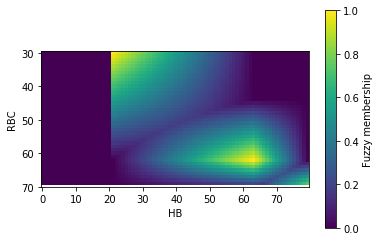

In [25]:
# Fuzzy relation
R1 = fuzz.relation_product(RBC_High, HB_High)
R2 = fuzz.relation_product(RBC_Normal, HB_Normal)
R3 = fuzz.relation_product(RBC_Low, HB_Low)

# Combine fuzzy relations into aggregate relation
R_combined = np.fmax(R1, np.fmax(R2, R3))

# Visualize 
plt.imshow(R_combined)
cbar = plt.colorbar()
cbar.set_label('Fuzzy membership')
plt.yticks([i * 10 for i in range(5)], [str(i * 10 + 30) for i in range(10)]);
plt.ylabel('RBC')
plt.xlabel('HB');

In [37]:
fuzz.defuzz(HB, R_combined[RBC == 69], 'centroid')


172.95506445672194

In [488]:
# Defuzzify to generate crisp solution
predicted_customers = np.zeros_like(RBC)

for i in range(len(predicted_customers)):
    predicted_customers[i] = fuzz.defuzz(HB, R_combined[i, :], 'centroid')

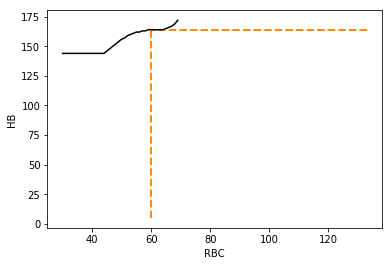

In [492]:
# Number of customers on our hypothetical 75 degree day
plt.plot(RBC, predicted_customers, 'k')
plt.vlines(60, 5, predicted_customers[RBC == 60], color='DarkOrange', linestyle='dashed', lw=2)
plt.hlines(predicted_customers[RBC == 60], 133, 60, color='DarkOrange', linestyle='dashed', lw=2)
plt.xlabel('RBC')
plt.ylabel('HB');

In [282]:
t_cool = fuzz.trapmf(temp, [20, 20, 30, 65])
print (t_cool)

[1.         0.97142857 0.94285714 0.91428571 0.88571429 0.85714286
 0.82857143 0.8        0.77142857 0.74285714 0.71428571 0.68571429
 0.65714286 0.62857143 0.6        0.57142857 0.54285714 0.51428571
 0.48571429 0.45714286 0.42857143 0.4        0.37142857 0.34285714
 0.31428571 0.28571429 0.25714286 0.22857143 0.2        0.17142857
 0.14285714 0.11428571 0.08571429 0.05714286 0.02857143 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


In [ ]:
quality['average'].view()